### Libraries to Import

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle

### Data Cleaning and Preprocessing 

In [2]:
url = 'https://harryawsbucket.s3.us-east-2.amazonaws.com/bitcoin_hist_data.csv'
bitcoin_data = pd.read_csv(url)

In [3]:
bitcoin_data

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...,...
3613764,4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
3613765,4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
3613766,4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
3613767,4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [4]:
# Check for NaN(Null) values

bitcoin_data.isna().sum()

Unnamed: 0           0
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [5]:
# Select cloumns

bitcoin_data = bitcoin_data[["Timestamp", "Open", 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']] 
bitcoin_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [6]:
# Convert Timestamp to Datetime

bitcoin_data['Timestamp'] = pd.to_datetime(bitcoin_data['Timestamp'],unit='s')
bitcoin_data

<ipython-input-6-48a983e455f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_data['Timestamp'] = pd.to_datetime(bitcoin_data['Timestamp'],unit='s')


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
3613764,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
3613765,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
3613766,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
3613767,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [7]:
# Rename Columns

final_data = bitcoin_data.rename(columns={'Volume_(BTC)':'Volume', 'Timestamp':'Datetime'})
final_data.head()

,Datetime,Open,High,Low,Close,Volume,Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [8]:
# Assign X (data) and y (target) and reshape the y-values

X = final_data[['High', 'Low', 'Volume']]
y = final_data['Close'].values.reshape(-1,1)

print(X.shape, y.shape)

(3613769, 3) (3613769, 1)


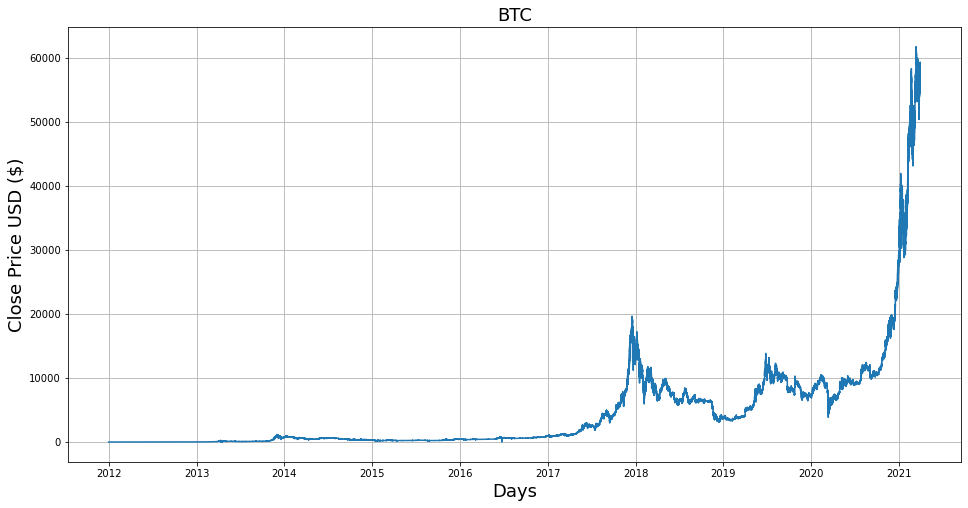

In [9]:
# Plot the Data

plt.figure(figsize=(16,8))
plt.title('BTC', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(final_data['Datetime'], final_data['Close'])
plt.grid(True)
plt.show()

### Model Creation and Testing

In [10]:
# Spliting the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
#from sklearn.preprocessing import StandardScaler

## Create a StandardScater model and fit it to the training data

#X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)

In [12]:
## Transform the training and testing data using the X_scaler and y_scaler models

#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)


#### Linear Regression Model

In [13]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Checking the model intercept

intercept = model.intercept_.tolist()
print(f'Intercept: {intercept}')

Intercept: [-0.005130637806360028]


In [15]:
# Checking the model coefficients

coeff = model.coef_.tolist()
print(f'Coefficients: {coeff}')

Coefficients: [[0.5216325138398706, 0.47835432548651724, -0.0020416883145688127]]


#### Predictions

In [16]:
# Make predictions using the fitted model

predictions = model.predict(X_test)

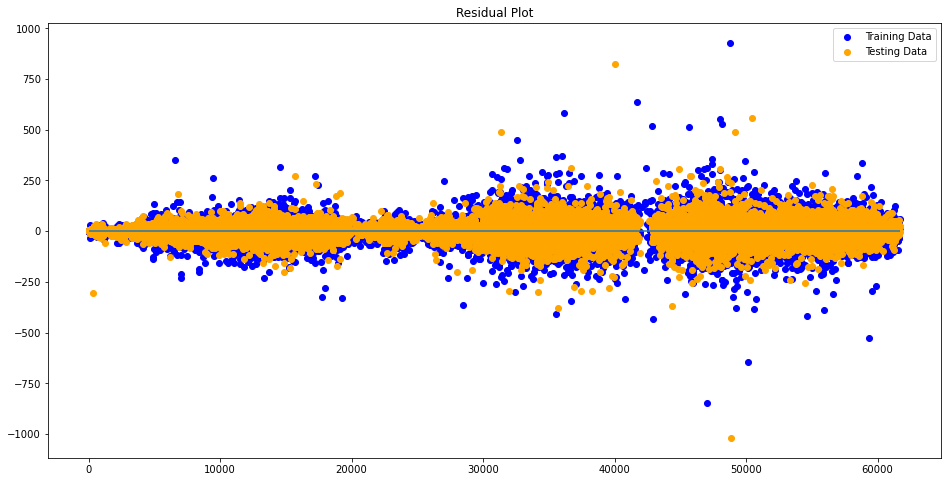

In [17]:
# Fit the model and Plot the Residuals

model.fit(X_train, y_train)
plt.figure(figsize=(16,8))
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()


In [18]:
# Calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 73.29975783156016, R2: 0.9999990888287418


#### Lasso Model

In [19]:
# Lasso Model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train, y_train)

L_predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, L_predictions)
r2 = lasso.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")


MSE: 129.84880229053206, R2: 0.9999983858814809


#### Ridge Model

In [20]:
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train, y_train)

R_predictions = ridge.predict(X_test)

MSE = mean_squared_error(y_test, R_predictions)
r2 = ridge.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 73.29975783188966, R2: 0.9999990888287418


#### ElasticNet model

In [21]:
# ElasticNet model

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

E_predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, E_predictions)
r2 = elasticnet.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 129.84880359839198, R2: 0.9999983858814647


In [22]:
# Create a DataFrame with the Actual y-values and Predictions from the selected linear regression model

results_df = pd.DataFrame(list(zip(y_test, predictions)))

In [23]:
results_df.columns=['Actual', 'Predicted']

In [24]:
results_df

,Actual,Predicted
0,[6.26],[6.086435483022427]
1,[14214.69],[14235.7481285015]
2,[9841.0],[9845.884648198298]
3,[798.99],[796.8902015326894]
4,[2475.97],[2475.3864587170115]
...,...,...
903438,[337.55],[337.07925925573215]
903439,[8919.44],[8926.305492963025]
903440,[294.9],[294.43254291904054]
903441,[2846.0],[2846.6144990291273]


#### Save The Model with Pickle

In [46]:
# Saving the model
Regression_model ='Regression_model.sav'
pickle.dump(model, open(Regression_model, 'wb'))